1. Use the raw dataset to create features,
2. Split the dataset into train and holdout datasets, 
3. EDA on the train dataset (box plots, histograms, correlation heatmap).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df.head()

,adm2_code,adm1_code,year,yield_x,area_harvested_obs,phen_gup,phen_dor,date,doy,met_avg_t,...,mod_lst_night,mod_nbar_1,mod_nbar_2,mod_nbar_3,mod_nbar_4,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi,yield_y
0,US01031,US01,2003,123.0,5500.0,72,295,2003-03-13,72,293.76627,...,282.27255,0.09871,0.26686,0.04669,0.08638,0.31560,0.26098,0.15028,0.459967,142.2
1,US01031,US01,2003,123.0,5500.0,72,295,2003-03-14,73,292.80722,...,285.86234,0.09768,0.26893,0.04630,0.08636,0.31718,0.26340,0.14898,0.467118,142.2
2,US01031,US01,2003,123.0,5500.0,72,295,2003-03-15,74,289.99115,...,285.86234,0.09785,0.26938,0.04638,0.08654,0.31782,0.26393,0.14927,0.467091,142.2
3,US01031,US01,2003,123.0,5500.0,72,295,2003-03-16,75,290.77440,...,285.86234,0.09905,0.26335,0.04692,0.08755,0.31069,0.26221,0.14926,0.453367,142.2
4,US01031,US01,2003,123.0,5500.0,72,295,2003-03-17,76,291.14648,...,285.86234,0.09932,0.26387,0.04703,0.08776,0.31132,0.26286,0.14969,0.453069,142.2


# Create holdout dataset

In [5]:
test_df=df[df['year']==2018]

In [6]:
test_df.describe()

,year,yield_x,area_harvested_obs,phen_gup,phen_dor,doy,met_avg_t,met_extreme_cold,met_extreme_hot1,met_extreme_hot2,...,mod_lst_night,mod_nbar_1,mod_nbar_2,mod_nbar_3,mod_nbar_4,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi,yield_y
count,236774.0,0.0,0.0,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,...,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,236774.000000,0.0
mean,2018.0,NaN,NaN,105.985387,292.533606,199.259496,293.380221,0.033952,0.042754,0.321078,...,286.800025,0.080860,0.339439,0.042024,0.080014,0.348701,0.269005,0.155619,0.606935,NaN
std,0.0,NaN,NaN,23.049900,16.373469,56.602322,6.443548,0.181107,0.202302,0.466892,...,5.902289,0.043606,0.074415,0.029890,0.032676,0.037807,0.056013,0.066222,0.180010,NaN
min,2018.0,NaN,NaN,53.000000,226.000000,53.000000,264.132930,0.000000,0.000000,0.000000,...,258.474500,0.025330,0.163550,0.013460,0.042140,0.164720,0.046750,0.027730,-0.054443,NaN
25%,2018.0,NaN,NaN,88.000000,282.000000,154.000000,290.034585,0.000000,0.000000,0.000000,...,283.383200,0.048620,0.278393,0.025810,0.060680,0.323690,0.223840,0.100960,0.459232,NaN
50%,2018.0,NaN,NaN,106.000000,291.000000,200.000000,294.766075,0.000000,0.000000,0.000000,...,288.143040,0.074678,0.336900,0.038005,0.073650,0.353660,0.257520,0.140600,0.610507,NaN
75%,2018.0,NaN,NaN,124.000000,301.000000,246.000000,298.104123,0.000000,0.000000,1.000000,...,291.215100,0.105000,0.397180,0.053100,0.093810,0.376710,0.304760,0.196208,0.775889,NaN
max,2018.0,NaN,NaN,156.000000,337.000000,337.000000,308.028700,1.000000,1.000000,1.000000,...,298.630280,0.854790,0.799570,0.828890,0.849240,0.471750,0.460980,0.396500,0.903914,NaN


In [7]:
print(df.columns)
print(df.dtypes)

Index(['adm2_code', 'adm1_code', 'year', 'yield_x', 'area_harvested_obs',
       'phen_gup', 'phen_dor', 'date', 'doy', 'met_avg_t', 'met_extreme_cold',
       'met_extreme_hot1', 'met_extreme_hot2', 'met_gdd', 'met_max_rh',
       'met_max_t', 'met_max_vpd', 'met_min_rh', 'met_min_t', 'met_p_mm',
       'met_sh', 'met_sr_wm2', 'mod_evi', 'mod_lst_day', 'mod_lst_night',
       'mod_nbar_1', 'mod_nbar_2', 'mod_nbar_3', 'mod_nbar_4', 'mod_nbar_5',
       'mod_nbar_6', 'mod_nbar_7', 'mod_ndvi', 'yield_y'],
      dtype='object')
adm2_code              object
adm1_code              object
year                    int64
yield_x               float64
area_harvested_obs    float64
phen_gup                int64
phen_dor                int64
date                   object
doy                     int64
met_avg_t             float64
met_extreme_cold        int64
met_extreme_hot1        int64
met_extreme_hot2        int64
met_gdd               float64
met_max_rh            float64
met_max_t          

# Create training dataset

In [8]:
train_df=df[df['year']!=2018]

# Create additional features on the train and test sets

In [47]:
train_feat_df=train_df.groupby(['adm2_code', 'adm1_code', 'year', 'yield_x', 'area_harvested_obs',
       'phen_gup', 'phen_dor']).agg({'met_extreme_cold':'sum',
                                     'met_extreme_hot1':'sum',
                                     'met_extreme_hot2':'sum',
                                     'met_avg_t':'mean',
                                     'met_min_t':'min',
                                     'met_max_t':'max',
                                     'met_max_vpd':'max',
                                     'met_min_rh':'min',
                                     'met_p_mm':['mean','min','max'],
                                     'met_sh':['mean','min','max'],
                                     'met_sr_wm2':['mean','min','max'],
                                     'mod_evi':['mean','min','max'],
                                     'mod_lst_day':['mean','min','max'],
                                     'mod_lst_night':['mean','min','max'],
                                     'mod_ndvi':['mean','min','max'],
                                     'mod_nbar_1':['mean','min','max'],
                                     'mod_nbar_2':['mean','min','max'],
                                     'mod_nbar_3':['mean','min','max'],
                                     'mod_nbar_4':['mean','min','max'],
                                     'mod_nbar_5':['mean','min','max'],
                                     'mod_nbar_6':['mean','min','max'],
                                     'mod_nbar_7':['mean','min','max'],
                                     })

In [48]:
test_feat_df=test_df.groupby(['adm2_code', 'adm1_code', 'year', 
       'phen_gup', 'phen_dor']).agg({'met_extreme_cold':'sum',
                                     'met_extreme_hot1':'sum',
                                     'met_extreme_hot2':'sum',
                                     'met_avg_t':'mean',
                                     'met_min_t':'min',
                                     'met_max_t':'max',
                                     'met_max_vpd':'max',
                                     'met_min_rh':'min',
                                     'met_p_mm':['mean','min','max'],
                                     'met_sh':['mean','min','max'],
                                     'met_sr_wm2':['mean','min','max'],
                                     'mod_evi':['mean','min','max'],
                                     'mod_lst_day':['mean','min','max'],
                                     'mod_lst_night':['mean','min','max'],
                                     'mod_ndvi':['mean','min','max'],
                                     'mod_nbar_1':['mean','min','max'],
                                     'mod_nbar_2':['mean','min','max'],
                                     'mod_nbar_3':['mean','min','max'],
                                     'mod_nbar_4':['mean','min','max'],
                                     'mod_nbar_5':['mean','min','max'],
                                     'mod_nbar_6':['mean','min','max'],
                                     'mod_nbar_7':['mean','min','max'],
                                     })

In [49]:
train_feat_df.head(20)

met_extreme_cold  \
                                                                                   sum   
adm2_code adm1_code year yield_x area_harvested_obs phen_gup phen_dor                    
US01031   US01      2003 123.0   5500.0             72       295                     1   
                    2004 111.0   6900.0             72       295                     2   
                    2005 127.0   6000.0             72       295                     0   
                    2006 85.0    5600.0             72       295                     2   
                    2007 73.0    8300.0             72       295                     2   
                    2009 63.0    5600.0             72       295                     0   
                    2010 82.2    6400.0             72       295                     0   
                    2013 106.6   5300.0             72       295                     3   
                    2016 104.5   6200.0             72       295                     0   
US01033   US01      2003 161.0   7800.0             84       281                     2   
                    2004 138.0   9200.0             84       281                     0   
                    2005 147.0   10000.0            84       281                     0   
                    2006 90.0    11400.0            84       281                     0   
                    2007 85.0    18300.0            84       281                     4   
                    2009 126.0   16400.0            84       281                     1   
                    2010 142.8   20800.0            84       281                     0   
                    2011 131.3   19500.0            84       281                     0   
                    2012 102.4   24500.0            84       281                     0   
                    2013 182.2   25500.0            84       281                     3   
                    2014 191.5   23200.0            84       281                     2   

                                                                      met_extreme_hot1  \
                                                                                   sum   
adm2_code adm1_code year yield_x area_harvested_obs phen_gup phen_dor                    
US01031   US01      2003 123.0   5500.0             72       295                     0   
                    2004 111.0   6900.0             72       295                     3   
                    2005 127.0   6000.0             72       295                     1   
                    2006 85.0    5600.0             72       295                    37   
                    2007 73.0    8300.0             72       295                    29   
                    2009 63.0    5600.0             72       295                    13   
                    2010 82.2    6400.0             72       295                    54   
                    2013 106.6   5300.0             72       295                    11   
                    2016 104.5   6200.0             72       295                     8   
US01033   US01      2003 161.0   7800.0             84       281                     0   
                    2004 138.0   9200.0             84       281                     0   
                    2005 147.0   10000.0            84       281                     7   
                    2006 90.0    11400.0            84       281                    28   
                    2007 85.0    18300.0            84       281                    23   
                    2009 126.0   16400.0            84       281                     5   
                    2010 142.8   20800.0            84       281                    26   
                    2011 131.3   19500.0            84       281                    51   
                    2012 102.4   24500.0            84       281                    46   
                    2013 182.2   25500.0            84       281                     4   
                   

In [50]:
test_feat_df.head()

met_extreme_cold met_extreme_hot1  \
                                                        sum              sum   
adm2_code adm1_code year phen_gup phen_dor                                     
US01031   US01      2018 72       295                     1               15   
US01033   US01      2018 84       281                     1                5   
US01049   US01      2018 73       299                     5                0   
US01071   US01      2018 77       292                     6                0   
US01077   US01      2018 78       284                     2                5   

                                           met_extreme_hot2   met_avg_t  \
                                                        sum        mean   
adm2_code adm1_code year phen_gup phen_dor                                
US01031   US01      2018 72       295                   101  296.390296   
US01033   US01      2018 84       281                    96  296.044677   
US01049   US01      2018 73       299                    59  293.815986   
US01071   US01      2018 77       292                    76  294.403428   
US01077   US01      2018 78       284                    98  295.413464   

                                            met_min_t  met_max_t met_max_vpd  \
                                                  min        max         max   
adm2_code adm1_code year phen_gup phen_dor                                     
US01031   US01      2018 72       295       271.92712  309.60855    1.850344   
US01033   US01      2018 84       281       272.49080  309.48737    1.427494   
US01049   US01      2018 73       299       271.10242  307.08472    0.964378   
US01071   US01      2018 77       292       271.55865  307.52740    1.004622   
US01077   US01      2018 78       284       271.97070  309.58722    1.343378   

                                           met_min_rh  met_p_mm       \
                                                  min      mean  min   
adm2_code adm1_code year phen_gup phen_dor                             
US01031   US01      2018 72       295        21.85247  4.605697  0.0   
US01033   US01      2018 84       281        26.24668  4.345303  0.0   
US01049   US01      2018 73       299        24.12053  3.607931  0.0   
US01071   US01      2018 77       292        27.48566  3.793989  0.0   
US01077   US01      2018 78       284        24.64226  4.416082  0.0   

                                                         met_sh        \
                                                  max      mean   min   
adm2_code adm1_code year phen_gup phen_dor                              
US01031   US01      2018 72       295        66.77693  0.014726  0.01   
US01033   US01      2018 84       281        69.55809  0.014111  0.01   
US01049   US01      2018 73       299        66.27134  0.014275  0.01   
US01071   US01      2018 77       292        68.63216  0.014345  0.01   
US01077   US01      2018 78       284       100.49642  0.013864  0.01   

                                                     met_sr_wm2             \
                                                max        mean        min   
adm2_code adm1_code year phen_gup phen_dor                                   
US01031   US01      2018 72       295       0.02036  232.088161  121.01926   
US01033   US01      2018 84       281       0.02178  222.682853   86.91653   
US01049   US01      2018 73       299       0.02272  218.628756   85.60484   
US01071   US01      2018 77       292       0.02260  217.383146   72.24636   
US01077   US01      2018 78       284       0.02170  220.273567   81.11335   

                                                        mod_evi            \
                                                  max      mean       min   
adm2_code adm1_code year phen_gup phen_dor                                  
US01031   US01      2018 72       295       320.40570  0.432055  0.319842   
US01033   US01      2018 84       281       319.87323  0.419951  

In [52]:
train_feat_df.columns = ["_".join(x) for x in train_feat_df.columns.ravel()]
test_feat_df.columns = ["_".join(x) for x in test_feat_df.columns.ravel()]

In [55]:
train_feat_df=train_feat_df.reset_index()
test_feat_df=test_feat_df.reset_index()

In [57]:
train_feat_df.to_csv('train_dataset.csv')


In [58]:
train_feat_df.head()

,adm2_code,adm1_code,year,yield_x,area_harvested_obs,phen_gup,phen_dor,met_extreme_cold_sum,met_extreme_hot1_sum,met_extreme_hot2_sum,met_avg_t_mean,met_min_t_min,met_max_t_max,met_max_vpd_max,met_min_rh_min,met_p_mm_mean,met_p_mm_min,met_p_mm_max,met_sh_mean,met_sh_min,met_sh_max,met_sr_wm2_mean,met_sr_wm2_min,met_sr_wm2_max,mod_evi_mean,mod_evi_min,mod_evi_max,mod_lst_day_mean,mod_lst_day_min,mod_lst_day_max,mod_lst_night_mean,mod_lst_night_min,mod_lst_night_max,mod_ndvi_mean,mod_ndvi_min,mod_ndvi_max,mod_nbar_1_mean,mod_nbar_1_min,mod_nbar_1_max,mod_nbar_2_mean,mod_nbar_2_min,mod_nbar_2_max,mod_nbar_3_mean,mod_nbar_3_min,mod_nbar_3_max,mod_nbar_4_mean,mod_nbar_4_min,mod_nbar_4_max,mod_nbar_5_mean,mod_nbar_5_min,mod_nbar_5_max,mod_nbar_6_mean,mod_nbar_6_min,mod_nbar_6_max,mod_nbar_7_mean,mod_nbar_7_min,mod_nbar_7_max
0,US01031,US01,2003,123.0,5500.0,72,295,1,0,105,295.990841,271.09167,306.39297,1.090953,28.643530,5.203809,0.0,57.50232,0.013721,0.01,0.017760,242.395990,71.090290,348.51974,0.412611,0.272788,0.545818,302.787696,295.92194,305.77127,289.545392,278.70140,294.55115,0.582226,0.453069,0.728950,0.093110,0.059890,0.126180,0.354316,0.257840,0.42572,0.043805,0.02819,0.058830,0.091597,0.070470,0.113350,0.383032,0.305170,0.445920,0.294719,0.242370,0.359690,0.167882,0.11175,0.234810
1,US01031,US01,2004,111.0,6900.0,72,295,2,3,112,295.946635,271.08118,309.43997,1.110776,21.180536,4.480146,0.0,104.05985,0.013539,0.01,0.018877,243.559584,66.946106,367.62192,0.403529,0.259658,0.563890,304.074910,296.48587,309.44354,289.178745,277.92587,294.20822,0.567168,0.394642,0.746574,0.096216,0.058518,0.139106,0.350952,0.276335,0.41190,0.045899,0.02927,0.065718,0.092265,0.069124,0.116018,0.381888,0.327212,0.419012,0.305693,0.244594,0.372859,0.178722,0.11848,0.258459
2,US01031,US01,2005,127.0,6000.0,72,295,0,1,129,296.225029,273.46927,308.15160,1.236585,26.368740,5.131178,0.0,75.10388,0.013804,0.01,0.019730,242.329972,94.832140,352.95486,0.416437,0.261648,0.608647,302.842733,297.16140,308.98978,289.786157,278.01443,295.17400,0.585358,0.420422,0.785504,0.092361,0.050040,0.134970,0.355018,0.270680,0.42922,0.043461,0.02456,0.062390,0.090145,0.066140,0.119400,0.380605,0.331210,0.424350,0.293601,0.237850,0.360430,0.166506,0.09699,0.249910
3,US01031,US01,2006,85.0,5600.0,72,295,2,37,153,296.704838,271.87802,310.49430,1.557903,18.919410,2.800742,0.0,57.60162,0.013050,0.01,0.018020,250.630870,56.840690,372.52057,0.384123,0.270349,0.556886,306.561295,295.78354,315.26825,289.104380,276.70470,293.82470,0.535076,0.410391,0.724180,0.107283,0.065160,0.150740,0.354115,0.270320,0.41658,0.051223,0.03198,0.071440,0.099908,0.074090,0.127720,0.386895,0.325580,0.432360,0.314021,0.252522,0.376950,0.202066,0.12675,0.267500
4,US01031,US01,2007,73.0,8300.0,72,295,2,29,149,296.968060,271.69128,311.83730,1.833030,20.241500,3.307996,0.0,65.38271,0.013127,0.01,0.018260,252.526246,90.119850,355.63074,0.388797,0.266843,0.562937,305.469293,296.88373,311.21317,289.407042,279.29303,295.98280,0.553988,0.409932,0.725044,0.099620,0.067000,0.141510,0.347252,0.283840,0.42298,0.046678,0.03336,0.065020,0.093294,0.072160,0.117330,0.383400,0.333340,0.436530,0.306551,0.256090,0.379590,0.186277,0.13142,0.266640


In [60]:
test_feat_df['yield_x']=None

In [61]:
test_feat_df.to_csv('test_dataset.csv')
pd.options.display.max_columns = None

# Dropping features based on analysis of the data

In [65]:
train_feat_df=train_feat_df.drop(['met_p_mm_min','met_sh_min'],axis=1)

In [67]:
test_feat_df=test_feat_df.drop(['met_p_mm_min','met_sh_min'],axis=1)

# Box plots and histograms to analyze the data

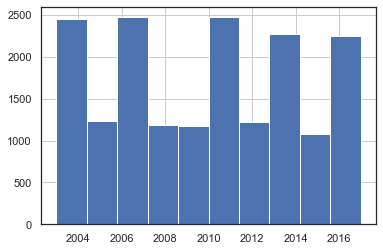

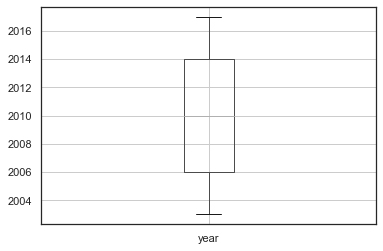

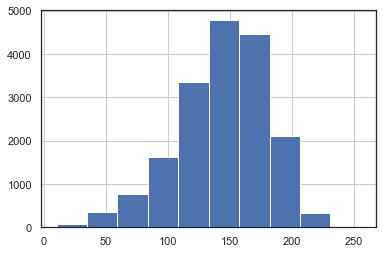

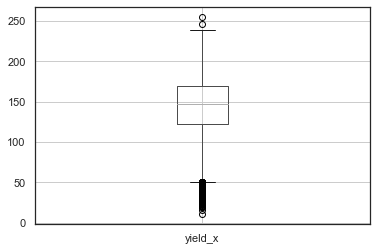

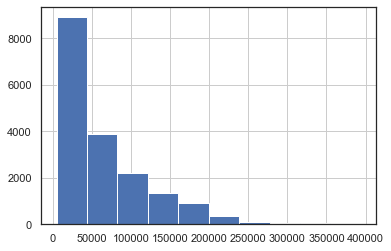

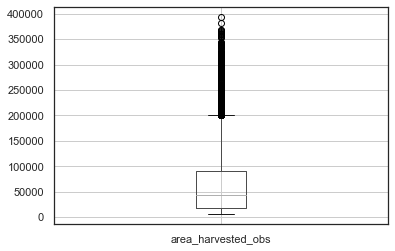

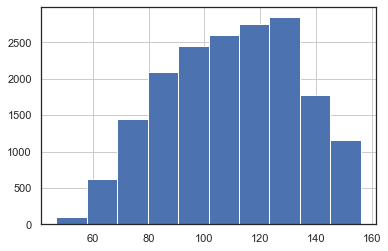

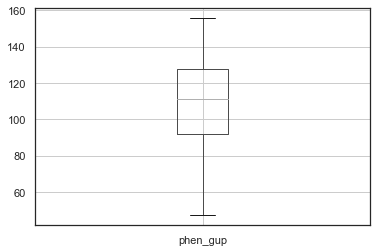

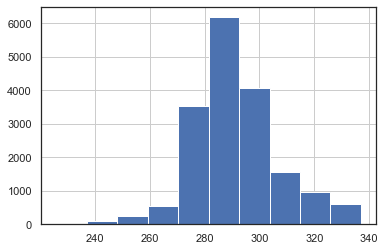

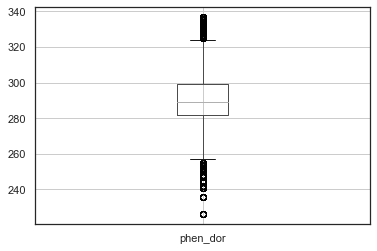

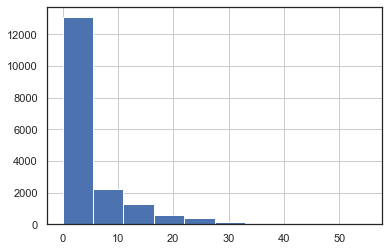

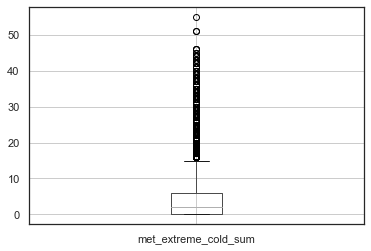

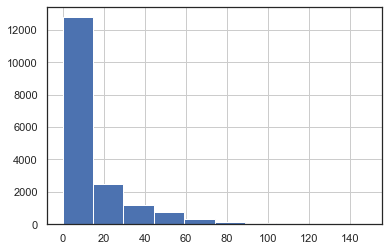

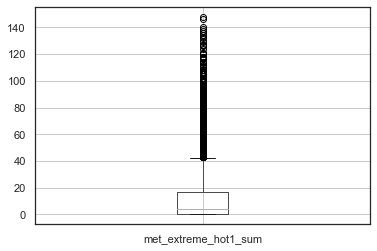

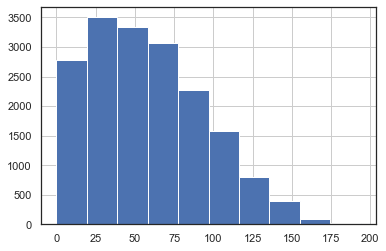

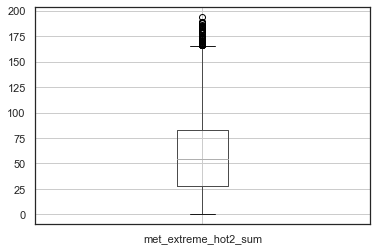

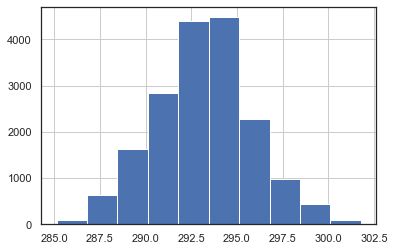

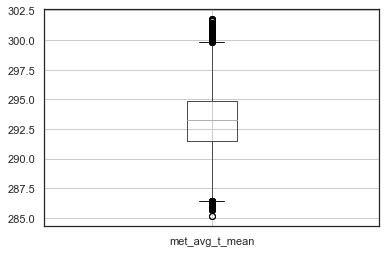

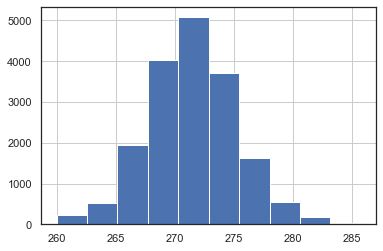

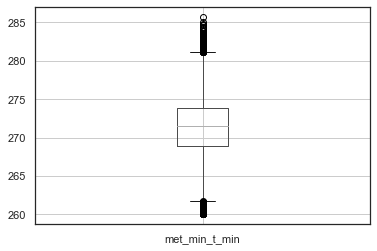

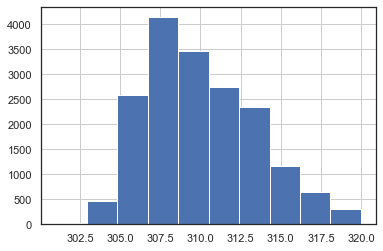

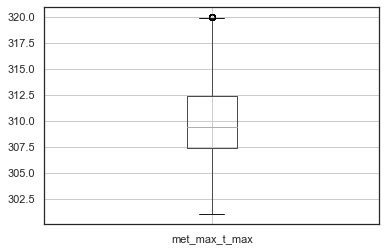

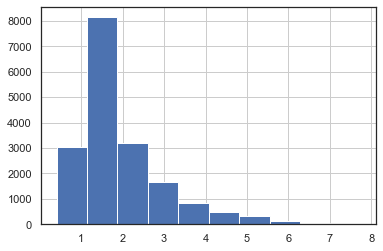

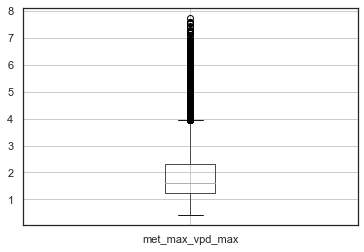

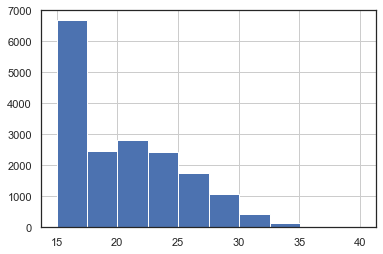

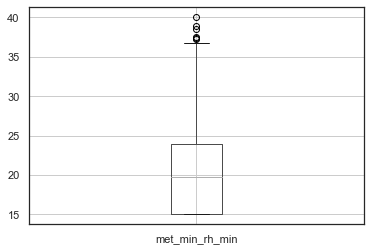

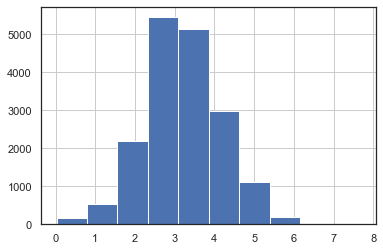

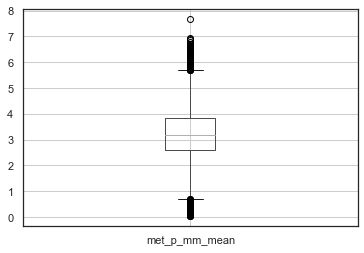

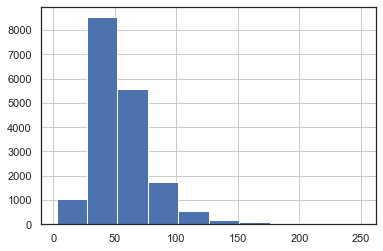

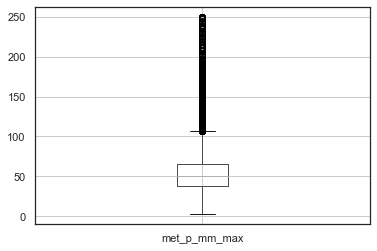

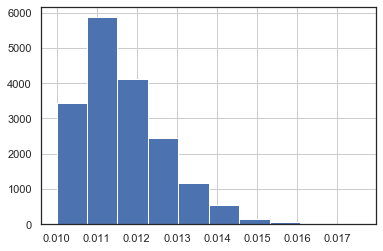

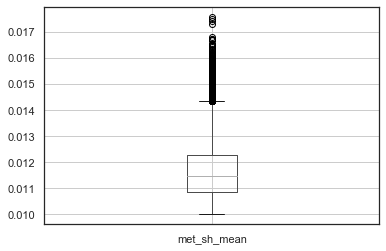

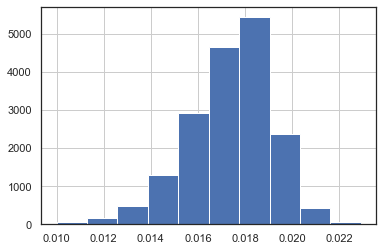

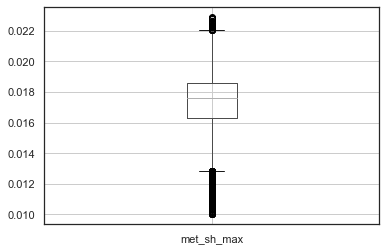

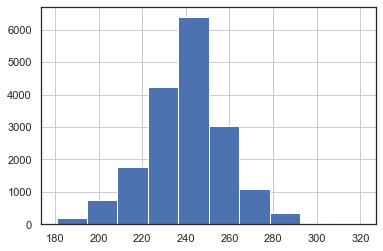

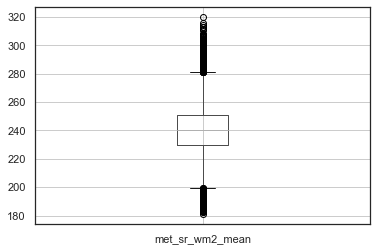

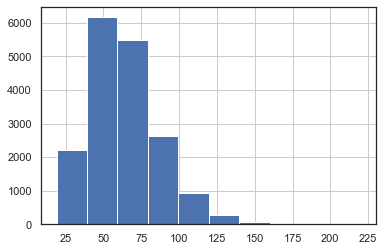

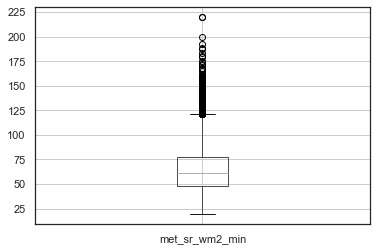

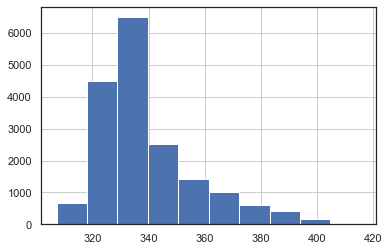

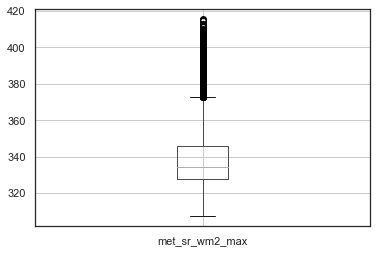

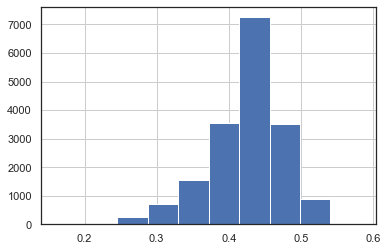

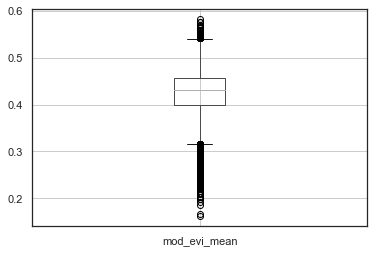

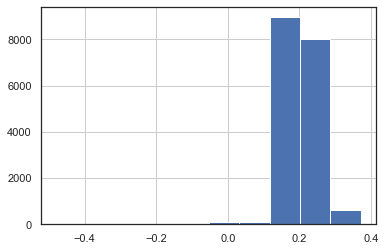

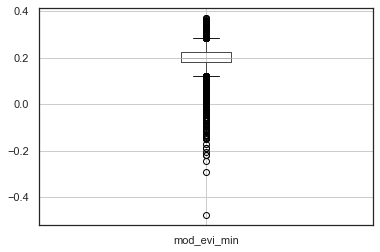

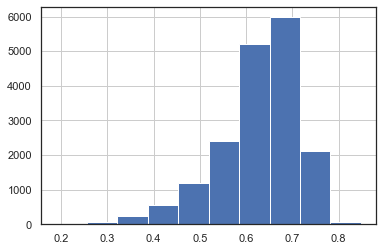

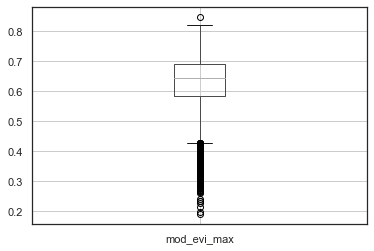

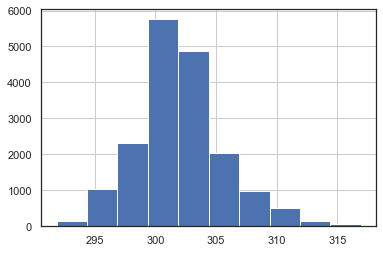

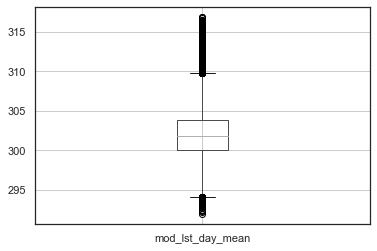

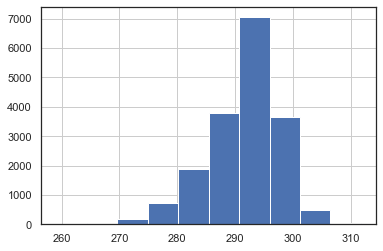

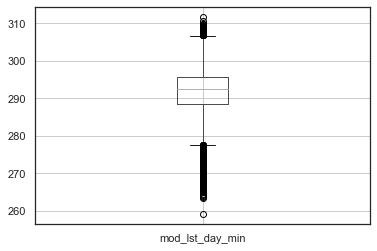

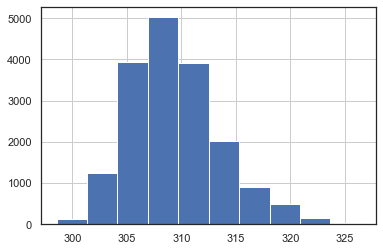

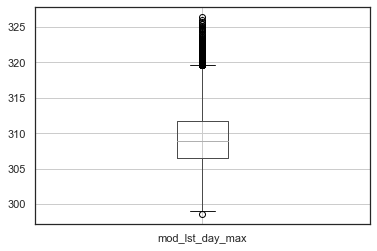

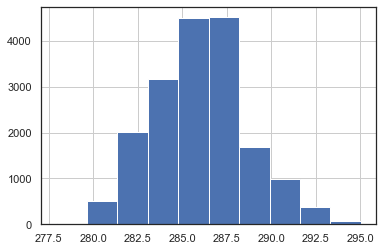

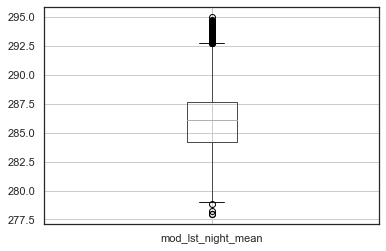

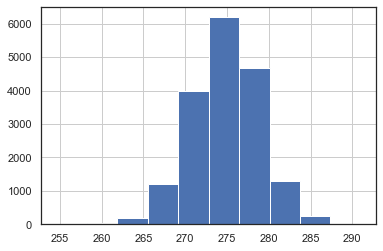

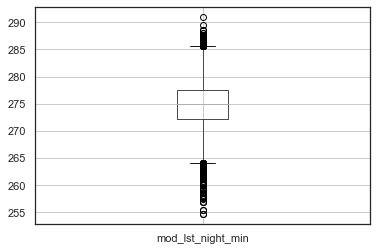

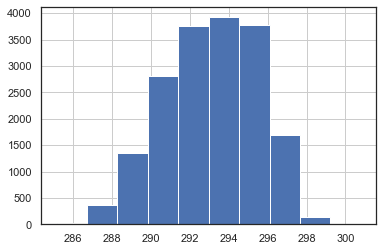

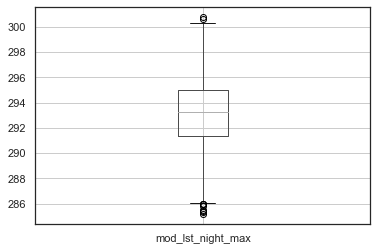

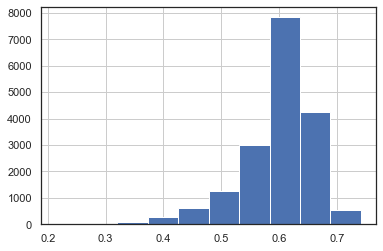

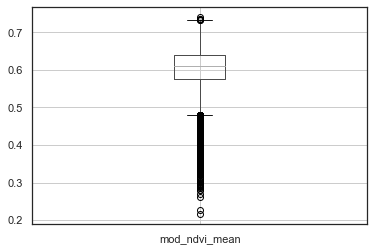

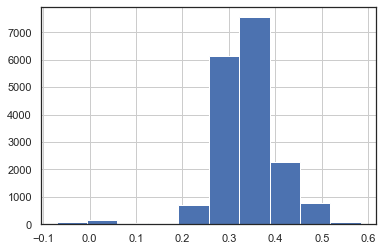

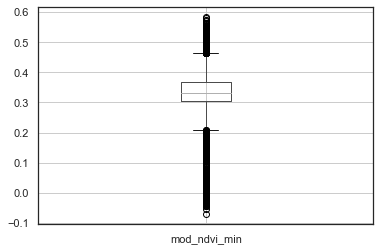

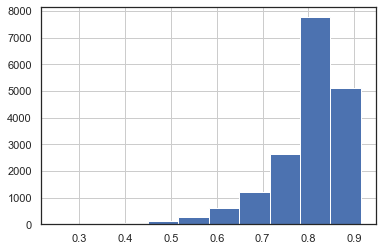

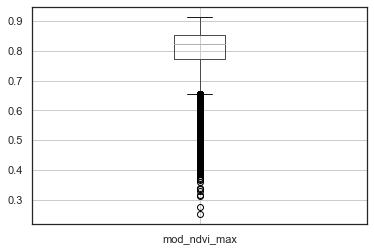

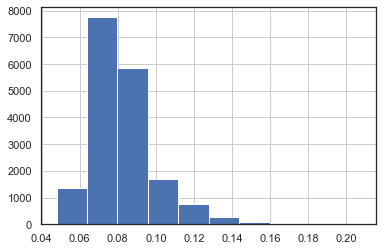

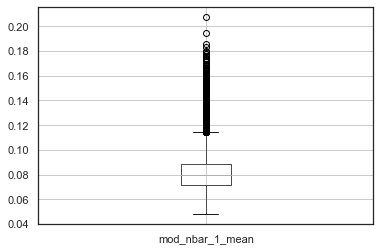

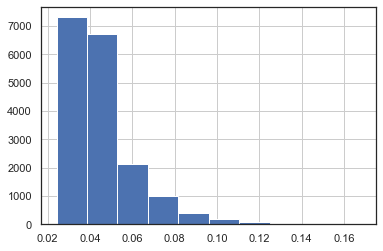

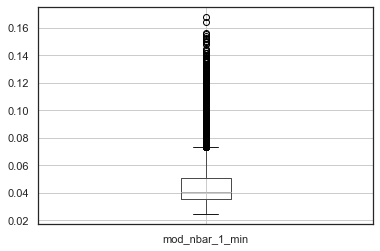

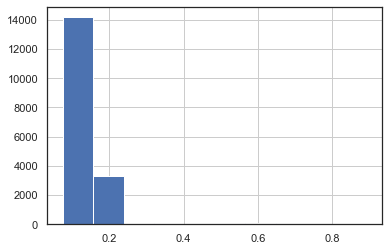

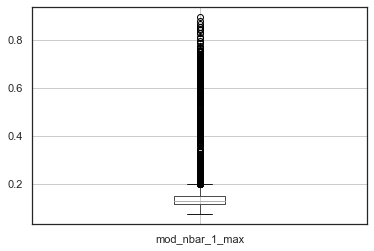

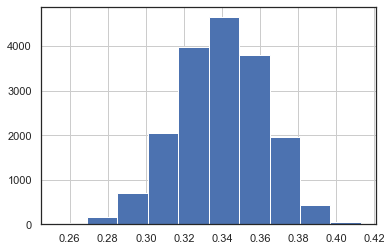

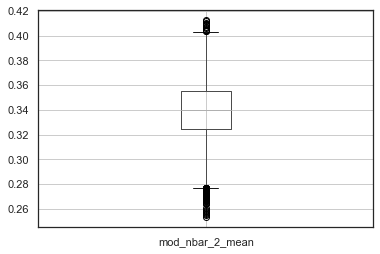

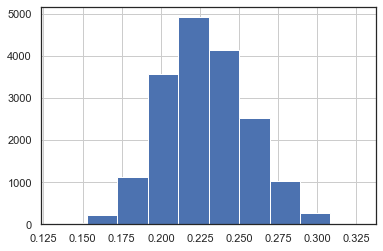

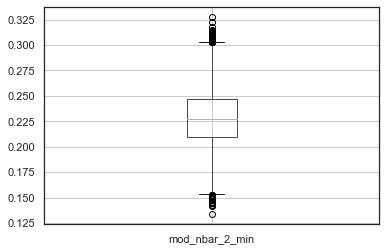

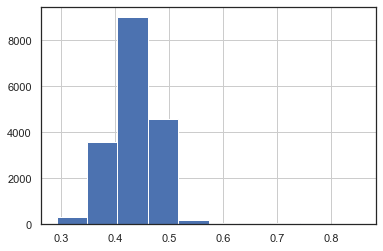

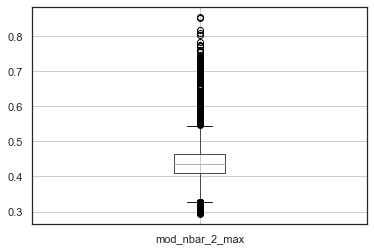

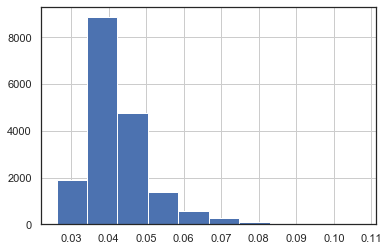

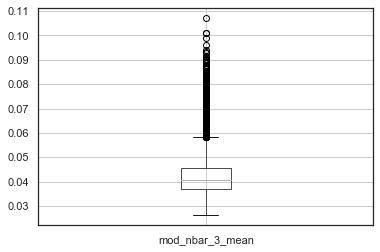

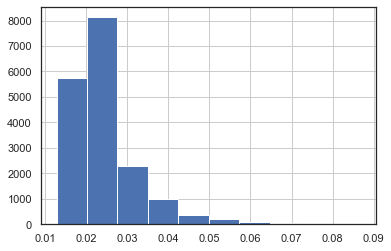

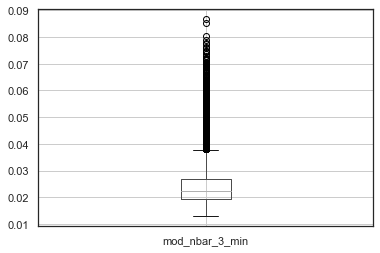

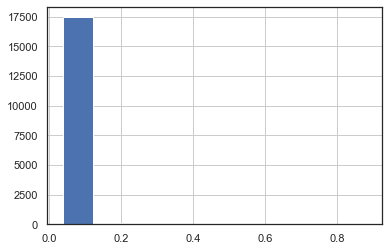

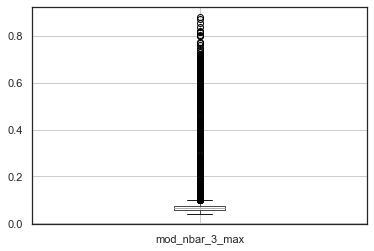

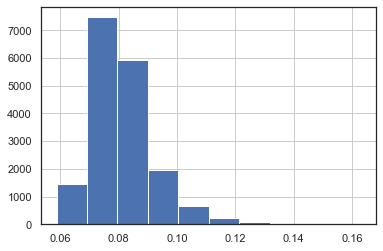

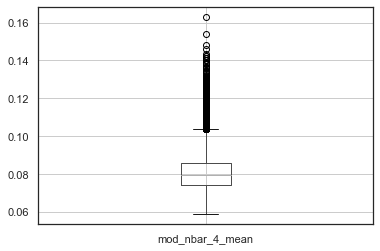

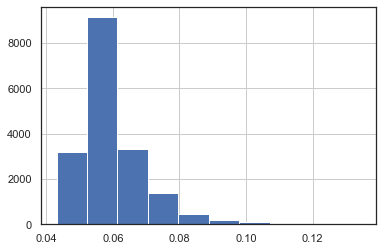

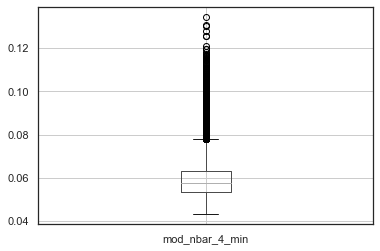

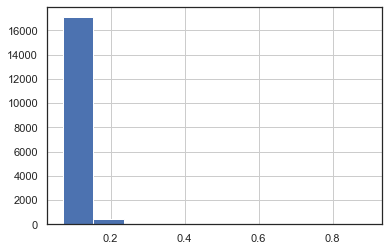

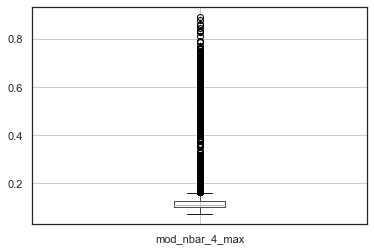

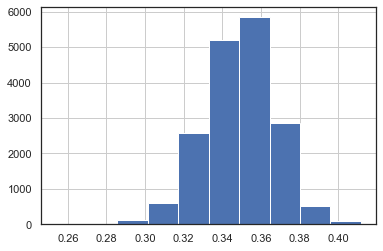

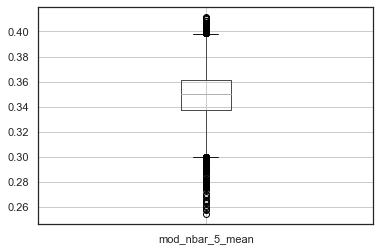

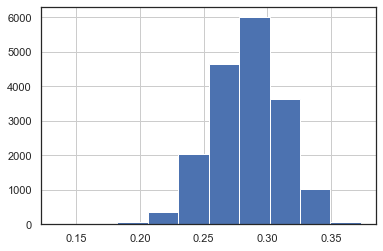

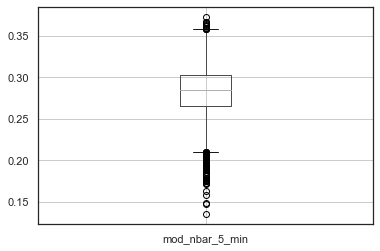

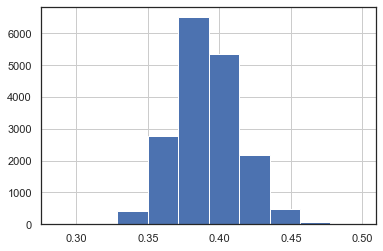

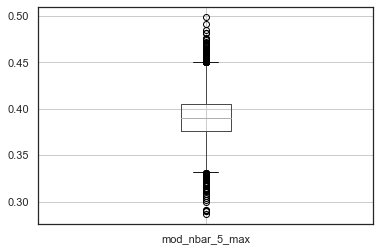

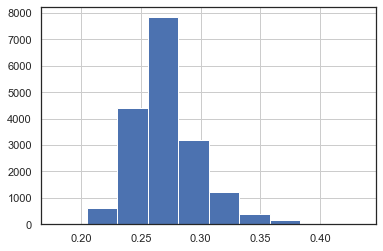

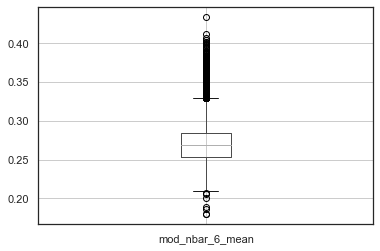

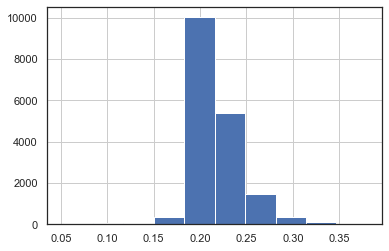

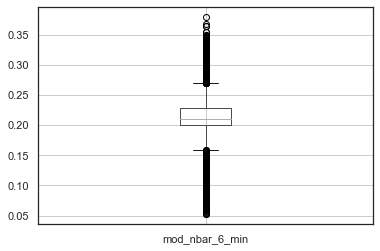

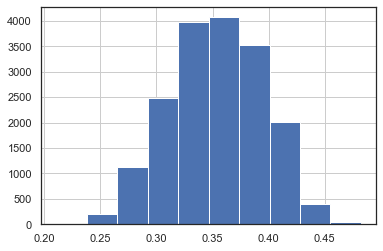

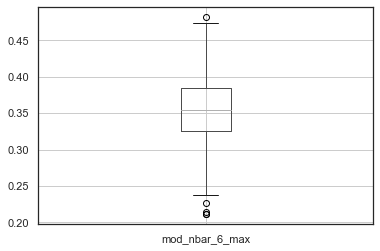

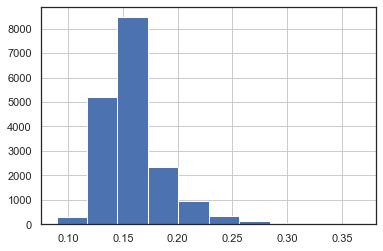

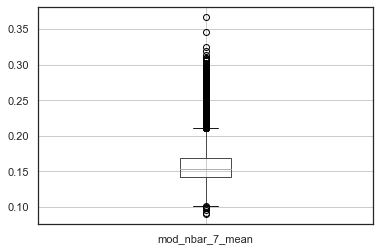

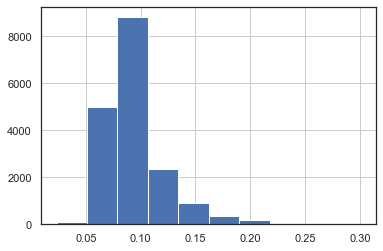

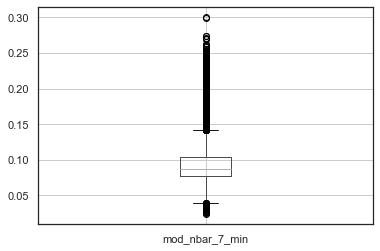

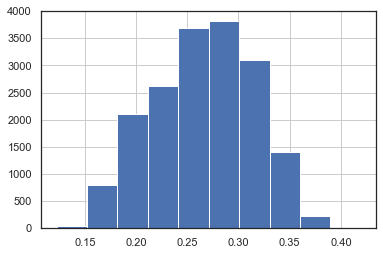

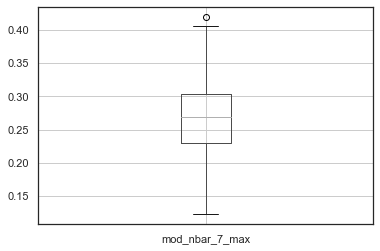

In [75]:

for i in train_feat_df.columns:
    if i!='adm2_code' and i!='adm1_code':
        plt.figure()
        train_feat_df[i].hist()
        plt.show()
        train_feat_df.boxplot(column=[i])
        
        

# Draw the correlation heatmap

In [76]:
cor_df=train_feat_df.corr()

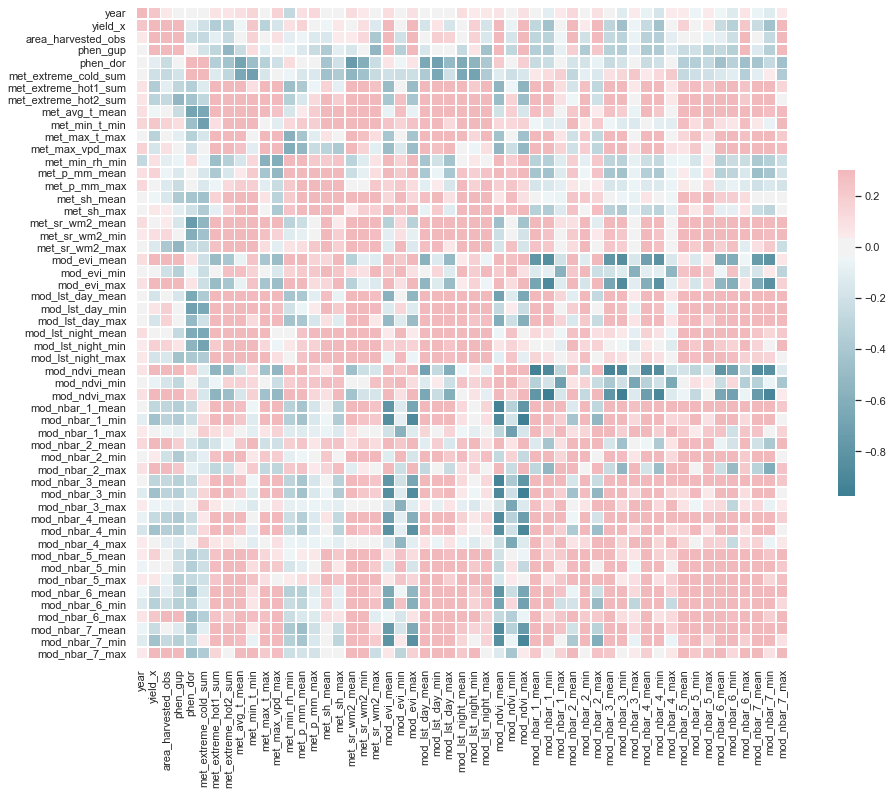

In [79]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap 
sns.heatmap(cor_df, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There are multiple features that have outliers. I will use Adaboost or XGBoost models which do a better job at outlier handling then linear models.